In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('Tata_Motors_Prices.xlsx',parse_dates=True,index_col='Date ')

In [ ]:
df.head()

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,
2022-06-20,390.55,392.95,376.65,388.95,384.75,382.7,382.70,536.7,268.45,17049013,6.524742e+09,215323
2022-06-21,389.00,399.00,387.00,382.70,398.10,397.6,394.92,536.7,268.45,14743366,5.822391e+09,148497
2022-06-22,396.40,397.00,390.50,397.60,392.80,393.1,393.64,536.7,268.45,12426604,4.891632e+09,120100
2022-06-23,396.30,409.90,394.55,393.10,407.15,407.2,403.60,536.7,268.45,26514004,1.070105e+10,284438
2022-06-24,410.00,412.85,406.15,407.20,408.75,409.3,409.69,536.7,268.45,14806456,6.066055e+09,168066


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496 entries, 2022-06-20 to 2024-06-19
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OPEN           496 non-null    float64
 1   HIGH           496 non-null    float64
 2   LOW            496 non-null    float64
 3   PREV. CLOSE    496 non-null    float64
 4   ltp            496 non-null    float64
 5   close          496 non-null    float64
 6   vwap           496 non-null    float64
 7   52W H          496 non-null    float64
 8   52W L          496 non-null    float64
 9   VOLUME         496 non-null    int64  
 10  VALUE          496 non-null    float64
 11  No of trades   496 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 50.4 KB


<Axes: xlabel='Date '>

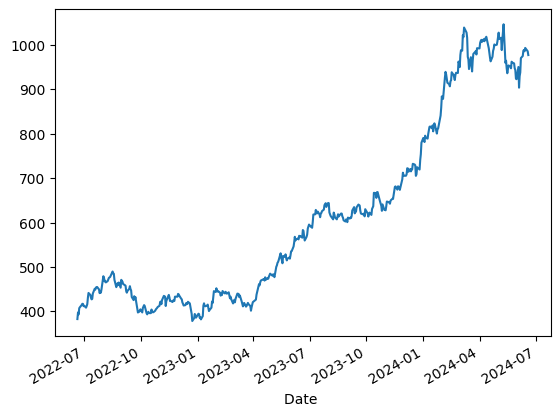

In [ ]:
df['close '].plot()

In [ ]:
len(df)

496

In [ ]:
motors_close = df['close ']

In [ ]:
motors_close.reset_index(drop=True,inplace=True)
motors_close.shape

(496,)

In [ ]:
motors_close = pd.DataFrame(motors_close)

In [ ]:
train = motors_close.iloc[:480]
test = motors_close.iloc[480:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Creating the model

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
test.shape

(16, 1)

In [ ]:
length = 16
batch_size = 32

generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length = length, batch_size=batch_size)

#creates an object of train - length and last 16 values will be predicted and validated

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout

In [ ]:
n_features = 1

In [ ]:
model = Sequential()

model.add(SimpleRNN(30,input_shape=(length,n_features)))

model.add(Dropout(rate=0.2))
#fully connected layer occupies most of the parameters, and hence, neurons develop co-dependency amongst each other
#during training which curbs the individual power of each neuron leading to over-fitting of training data.
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(generator,epochs=10,shuffle=False) #generally takes much longer time than ANN

Epoch 1/10
15/15 [==============================] - 1s 6ms/step - loss: 0.0359
Epoch 2/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0546
Epoch 3/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0154
Epoch 4/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0107
Epoch 5/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0113
Epoch 6/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0167
Epoch 7/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0147
Epoch 8/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0185
Epoch 9/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0176
Epoch 10/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0165


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 30)                960       
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 991 (3.87 KB)
Trainable params: 991 (3.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

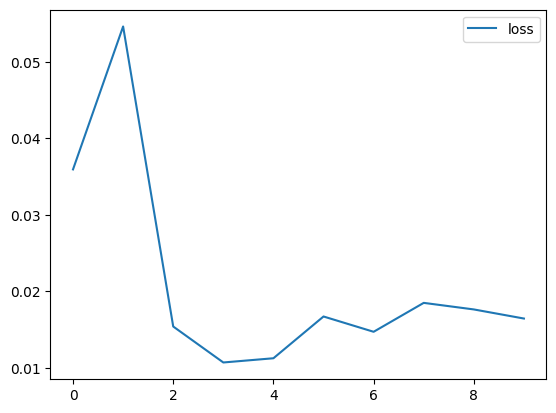

In [ ]:
losses.plot()

#EVALUATING TEST SET :

In [ ]:
first_eval_batch = scaled_train[-length:] #picks last 16 values in train set

In [ ]:
first_eval_batch

array([[0.95443663],
       [0.913063  ],
       [0.94830166],
       [0.97553494],
       [1.        ],
       [0.86996858],
       [0.87730061],
       [0.85133922],
       [0.83502918],
       [0.84894508],
       [0.86128984],
       [0.85732455],
       [0.85163849],
       [0.87385905],
       [0.87116564],
       [0.86809816]])

In [ ]:
first_eval_batch = first_eval_batch.reshape((1,length,1))

In [ ]:
first_eval_batch

array([[[0.95443663],
        [0.913063  ],
        [0.94830166],
        [0.97553494],
        [1.        ],
        [0.86996858],
        [0.87730061],
        [0.85133922],
        [0.83502918],
        [0.84894508],
        [0.86128984],
        [0.85732455],
        [0.85163849],
        [0.87385905],
        [0.87116564],
        [0.86809816]]])

In [ ]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 239ms/step


array([[0.88891613]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.8517133])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):

  #get prediction 1 time stamp ahead ([8] is for grabbing just the number instead of (array])
  current_pred = model.predict(current_batch)[0]

  #store prediction
  test_predictions.append(current_pred)

  #update batch to now include prediction and drop first value
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 34ms/step


In [ ]:
test_predictions

[array([0.88891613], dtype=float32),
 array([0.8707835], dtype=float32),
 array([0.8730212], dtype=float32),
 array([0.9311634], dtype=float32),
 array([0.9244415], dtype=float32),
 array([0.8766635], dtype=float32),
 array([0.91698104], dtype=float32),
 array([0.8892493], dtype=float32),
 array([0.8623038], dtype=float32),
 array([0.90309733], dtype=float32),
 array([0.8961993], dtype=float32),
 array([0.8301507], dtype=float32),
 array([0.88260096], dtype=float32),
 array([0.89608455], dtype=float32),
 array([0.83855355], dtype=float32),
 array([0.888685], dtype=float32)]

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
true_predictions

array([[ 972.41265291],
       [ 960.29461828],
       [ 961.7900582 ],
       [1000.64648058],
       [ 996.15426541],
       [ 964.22422108],
       [ 991.16842999],
       [ 972.63532376],
       [ 954.62762515],
       [ 981.88994666],
       [ 977.27998282],
       [ 933.13972849],
       [ 968.19222365],
       [ 977.20330279],
       [ 938.75533603],
       [ 972.2581775 ]])

In [ ]:
test.loc[:,'predictions'] = true_predictions

In [ ]:
test

,close,predictions
480,947.55,972.412653
481,943.60,960.294618
482,923.95,961.790058
483,923.00,1000.646481
484,950.45,996.154265
485,903.90,964.224221
486,929.95,991.168430
487,938.25,972.635324
488,970.50,954.627625
489,975.15,981.889947


<Axes: >

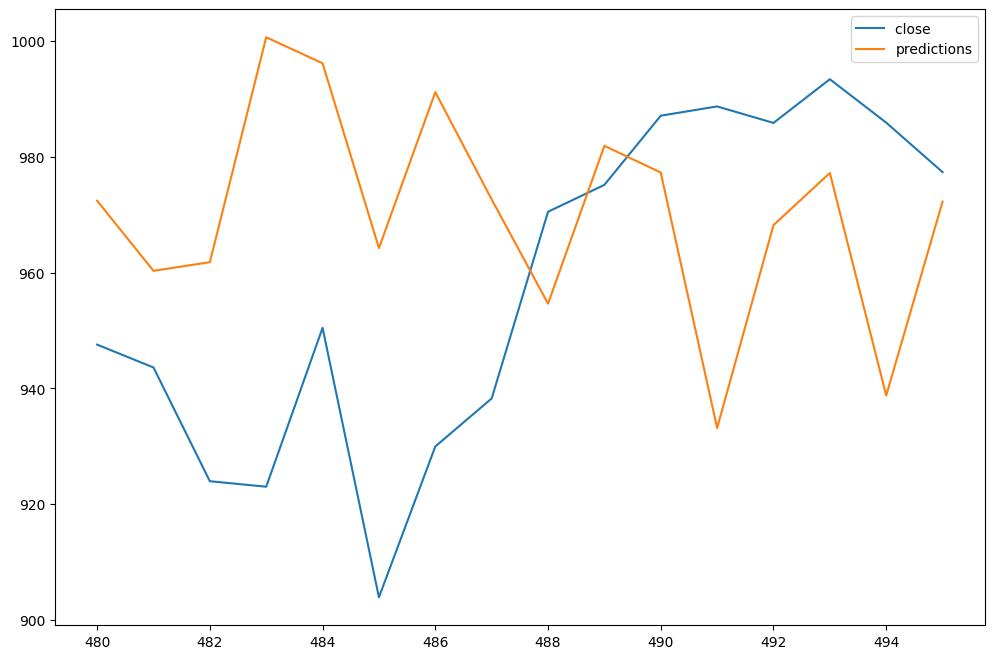

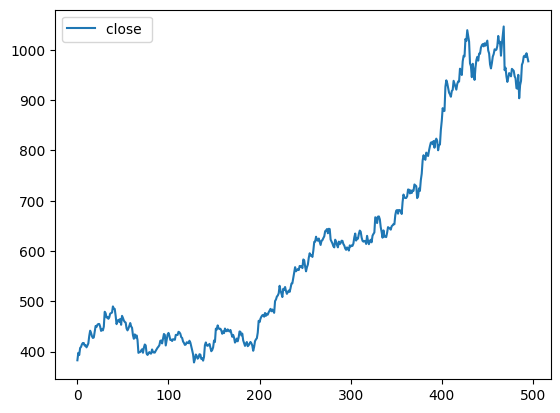

In [ ]:
test.plot(figsize=(12,8))
motors_close.plot()

#Full model

In [ ]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(motors_close)

In [ ]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,
                                length = length, batch_size=32)

In [ ]:
model = Sequential()

model.add(SimpleRNN(30,input_shape=(length,n_features)))

model.add(Dropout(rate=0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 30)                960       
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 991 (3.87 KB)
Trainable params: 991 (3.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit_generator(generator,epochs=10,shuffle=False)

Epoch 1/10


<ipython-input-79-b5005ef83afd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=10,shuffle=False)


15/15 [==============================] - 1s 5ms/step - loss: 0.0209
Epoch 2/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0270
Epoch 3/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0094
Epoch 4/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 5/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0052
Epoch 6/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0051
Epoch 7/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 8/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 9/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0055
Epoch 10/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0058


<Axes: >

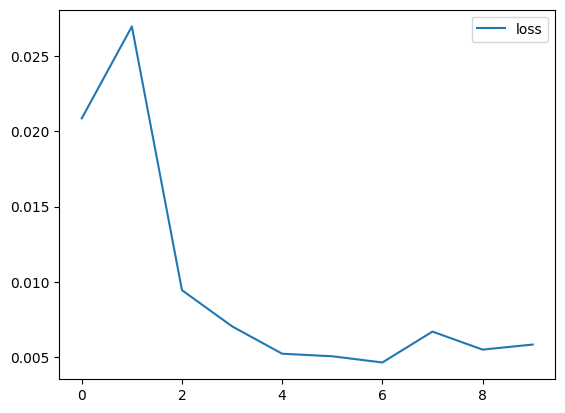

In [ ]:
full_model_losses = pd.DataFrame(model.history.history)
full_model_losses.plot()

In [ ]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(20):

  #get prediction 1 time stamp ahead ([8] is for grabbing just the number instead of (array])
  current_pred = model.predict(current_batch)[0]

  #store prediction
  forecast.append(current_pred)

  #update batch to now include prediction and drop first value
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 35ms/step


In [ ]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[944.85599957],
       [947.69710439],
       [932.55309635],
       [925.26391219],
       [930.32590981],
       [915.40389545],
       [901.98572594],
       [906.28092321],
       [901.30871094],
       [883.91477128],
       [883.6013989 ],
       [886.34590679],
       [873.19139709],
       [866.13277088],
       [872.09700371],
       [865.65070243],
       [852.60840451],
       [859.54649369],
       [859.11991369],
       [842.9967514 ]])

In [ ]:
forecast.flatten()

array([944.85599957, 947.69710439, 932.55309635, 925.26391219,
       930.32590981, 915.40389545, 901.98572594, 906.28092321,
       901.30871094, 883.91477128, 883.6013989 , 886.34590679,
       873.19139709, 866.13277088, 872.09700371, 865.65070243,
       852.60840451, 859.54649369, 859.11991369, 842.9967514 ])

In [ ]:
df_array = np.array(motors_close)
df_array

array([[ 382.7 ],
       [ 397.6 ],
       [ 393.1 ],
       [ 407.2 ],
       [ 409.3 ],
       [ 414.5 ],
       [ 417.1 ],
       [ 416.95],
       [ 411.8 ],
       [ 412.7 ],
       [ 408.45],
       [ 412.  ],
       [ 416.35],
       [ 430.85],
       [ 441.55],
       [ 437.05],
       [ 430.55],
       [ 427.1 ],
       [ 428.05],
       [ 440.2 ],
       [ 450.9 ],
       [ 449.05],
       [ 453.45],
       [ 454.85],
       [ 454.9 ],
       [ 449.55],
       [ 441.15],
       [ 444.05],
       [ 442.25],
       [ 449.6 ],
       [ 479.2 ],
       [ 476.25],
       [ 467.8 ],
       [ 468.9 ],
       [ 465.25],
       [ 468.25],
       [ 475.55],
       [ 476.65],
       [ 477.55],
       [ 489.85],
       [ 485.4 ],
       [ 484.8 ],
       [ 471.  ],
       [ 454.6 ],
       [ 460.45],
       [ 463.2 ],
       [ 459.2 ],
       [ 465.05],
       [ 453.35],
       [ 471.1 ],
       [ 466.9 ],
       [ 461.75],
       [ 459.  ],
       [ 457.75],
       [ 445.85],
       [ 4

In [ ]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(), forecast.flatten())))

<Axes: >

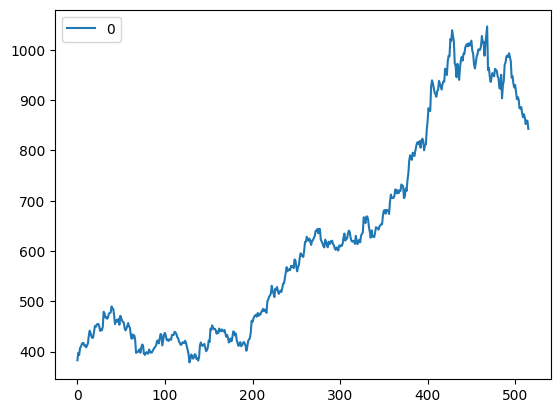

In [ ]:
full_data.plot()

#LSTM model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
length

16

In [ ]:
scaled_test.shape

(16, 1)

In [ ]:
length = 15
generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length = length, batch_size=32)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                length = length, batch_size=32)


In [ ]:
model = Sequential()

model.add(LSTM(30,input_shape=(length,n_features)))

#model.add(LSTM(30)) - stacked LSTM

model.add(Dropout(rate=0.2))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(generator,epochs=20,
          validation_data = validation_generator,
          callbacks=[early_stop],shuffle=False)

Epoch 1/20
15/15 [==============================] - 3s 50ms/step - loss: 0.0493 - val_loss: 0.1045
Epoch 2/20
15/15 [==============================] - 0s 11ms/step - loss: 0.0082 - val_loss: 0.0019
Epoch 3/20
15/15 [==============================] - 0s 11ms/step - loss: 0.0103 - val_loss: 0.0033
Epoch 4/20
15/15 [==============================] - 0s 12ms/step - loss: 0.0060 - val_loss: 0.0021


<Axes: >

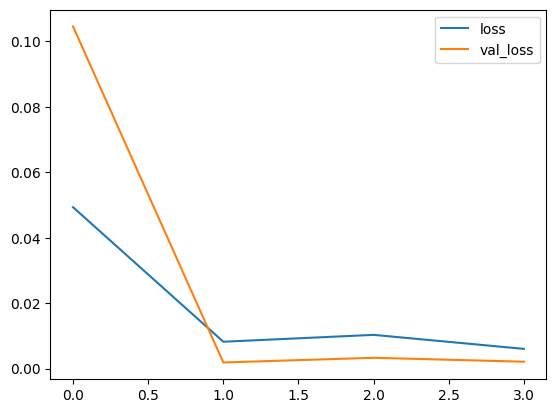

In [ ]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):

  #get prediction 1 time stamp ahead ([8] is for grabbing just the number instead of (array])
  current_pred = model.predict(current_batch)[0]

  #store prediction
  test_predictions.append(current_pred)

  #update batch to now include prediction and drop first value
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 21ms/step


<ipython-input-99-763b8d252c92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'LSTM_predictions'] = true_predictions


<Axes: >

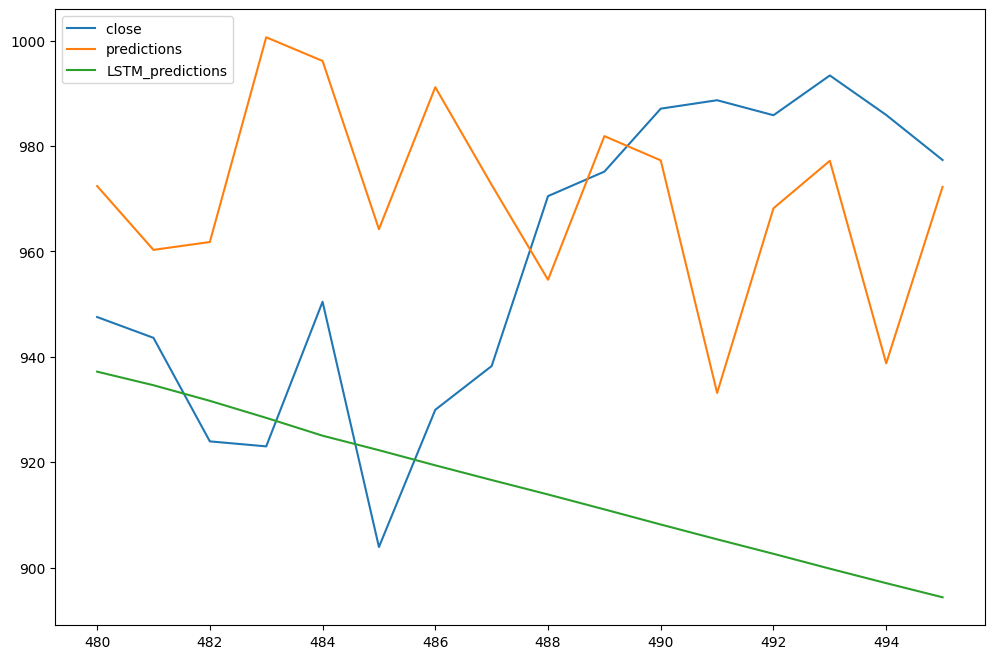

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
test.loc[:,'LSTM_predictions'] = true_predictions
test.plot(figsize=(12,8))

In [ ]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(15):

  #get prediction 1 time stamp ahead ([8] is for grabbing just the number instead of (array])
  current_pred = model.predict(current_batch)[0]

  #store prediction
  forecast.append(current_pred)

  #update batch to now include prediction and drop first value
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 22ms/step


In [ ]:
forecast=scaler.inverse_transform(forecast)

In [ ]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(), forecast.flatten())))

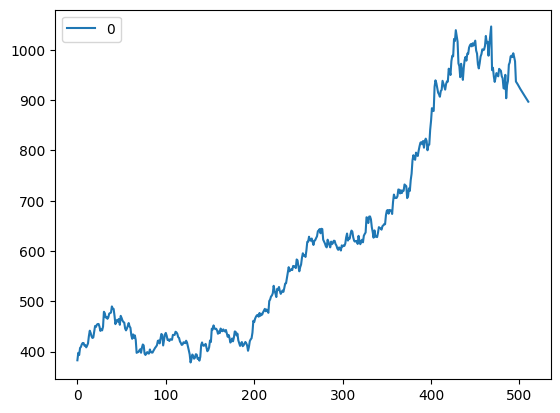

In [ ]:
full_data.plot();

In [ ]:
forecast

array([[937.18034804],
       [934.60501423],
       [931.64261554],
       [928.41189649],
       [925.02821569],
       [922.27526304],
       [919.40105635],
       [916.61293046],
       [913.87017526],
       [911.04217576],
       [908.17183294],
       [905.3580541 ],
       [902.60820848],
       [899.78821557],
       [897.04052098]])

In [ ]:
full_data.tail(30)

,0
481,943.600000
482,923.950000
483,923.000000
484,950.450000
485,903.900000
486,929.950000
487,938.250000
488,970.500000
489,975.150000
490,987.100000
